In [ ]:
# default_exp data_transformation

# Data Transformation

> Week 3 Discussion

In [ ]:
#hide
from nbdev.showdoc import *

Pick a monthly series of your choosing, plot it and explain how would you adjust it (if at all) before engaging in forecasting.  Also, does it look like the series has a trend?  Does it seem to have a seasonal component and if yes, does it appear fairly strong or fairly weak?

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression

### Median Sales Price for New Houses Sold in the United States (MSPNHSUS)

Dollars, Not seasonally adjusted, Monthly

In [ ]:
df = pd.read_csv("../data/MSPNHSUS.csv")
# Select years after 1967
# Because CPI data starts from 1967
df = df[pd.to_datetime(df['DATE']).dt.year >= 1967]
df.columns = ['DATE', 'NOMINAL']
print(df.head())
print("Shape:", df.shape)

          DATE  NOMINAL
48  1967-01-01  22200.0
49  1967-02-01  22400.0
50  1967-03-01  22400.0
51  1967-04-01  22300.0
52  1967-05-01  23700.0
Shape: (648, 2)


### Consumer Price Index for All Urban Consumers: Housing in U.S. City Average (CPIHOSNS)

Index 1982-1984=100, Not Seasonally Adjusted, Monthly

In [ ]:
df_cpi = pd.read_csv("../data/CPIHOSNS.csv")
print(df_cpi.head())
print("Shape:", df_cpi.shape)

         DATE  CPIHOSNS
0  1967-01-01      30.5
1  1967-02-01      30.5
2  1967-03-01      30.5
3  1967-04-01      30.6
4  1967-05-01      30.7
Shape: (649, 2)


In [ ]:
df["CPI"] = list(df_cpi["CPIHOSNS"][:df.shape[0]])
print(df.head())

          DATE  NOMINAL   CPI
48  1967-01-01  22200.0  30.5
49  1967-02-01  22400.0  30.5
50  1967-03-01  22400.0  30.5
51  1967-04-01  22300.0  30.6
52  1967-05-01  23700.0  30.7


Converting CPI to quarterly if needed. No need in this case

In [ ]:
# quarterly_cpi = []
# temp_sum = 0
# for i, cpi in enumerate(df_cpi["CPIHOSNS"]):
#     temp_sum += cpi
#     if (i+1) % 3 == 0:
#         quarterly_cpi.append(temp_sum / 3)
#         temp_sum = 0

### Plot

In [ ]:
#export
def plot_data(df_dates, prices_dict):
    """
    the second argument requires a dictionary
    """
    # Convert strings to datetime
    dates = [pd.to_datetime(date, format='%Y-%m-%d') for date in df_dates]

    fig, ax = plt.subplots()
    for key, value in prices_dict.items():
        ax.plot(dates, value, label=key)

    # format the ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # format the coords message box
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    # rotates and right aligns the x labels, and moves the bottom of the
    # axes up to make room for them
    fig.autofmt_xdate()

    # Only show xtick for every 5 years
    every_nth = 5
    for n, xtick in enumerate(ax.xaxis.get_major_ticks()):
        if n % every_nth != 0:
            xtick.label1.set_visible(False)
            xtick.set_visible(False)
    
    return fig, ax

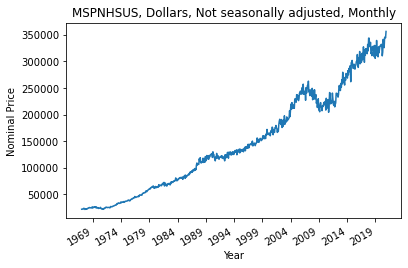

In [ ]:
%matplotlib inline

prices_dict = {}
prices_dict["NOMINAL"] = df["NOMINAL"]
fig, ax = plot_data(df["DATE"], prices_dict)
plt.title("MSPNHSUS, Dollars, Not seasonally adjusted, Monthly")
plt.ylabel("Nominal Price")
plt.xlabel("Year")
plt.show()

### Adjust to current dollars

In [ ]:
current_cpi = df["CPI"].iloc[-1]
print("Current CPI:", current_cpi)

Current CPI: 273.684


In [ ]:
current_dollar = []
for i, nominal in enumerate(df["NOMINAL"]):
    real = nominal * current_cpi / df["CPI"].iloc[i]
    current_dollar.append(real)

In [ ]:
df["REAL"] = current_dollar
print(df.head())

          DATE  NOMINAL   CPI           REAL
48  1967-01-01  22200.0  30.5  199206.059016
49  1967-02-01  22400.0  30.5  201000.708197
50  1967-03-01  22400.0  30.5  201000.708197
51  1967-04-01  22300.0  30.6  199449.450980
52  1967-05-01  23700.0  30.7  211280.482085


### Plot in current dollar

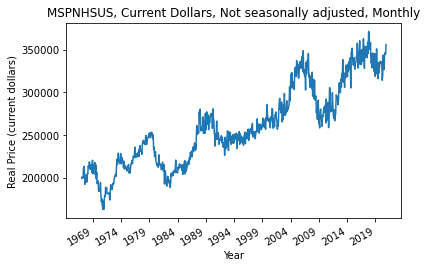

In [ ]:
%matplotlib inline

prices_dict = {}
prices_dict["REAL"] = df["REAL"]
fig, ax = plot_data(df["DATE"], prices_dict)

plt.title("MSPNHSUS, Current Dollars, Not seasonally adjusted, Monthly")
plt.ylabel("Real Price (current dollars)")
plt.xlabel("Year")
plt.show()

### Nominal vs Real

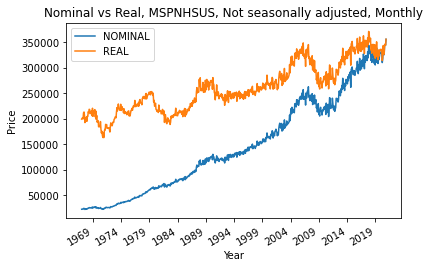

In [ ]:
%matplotlib inline

prices_dict = {}
prices_dict["NOMINAL"] = df["NOMINAL"]
prices_dict["REAL"] = df["REAL"]
fig, ax = plot_data(df["DATE"], prices_dict)

plt.title("Nominal vs Real, MSPNHSUS, Not seasonally adjusted, Monthly")
plt.ylabel("Price")
plt.xlabel("Year")
plt.legend()
# plt.savefig('comparison.png', dpi=400, bbox_inches='tight')
plt.show()

### Regression

In [ ]:
model = LinearRegression().fit(np.array(range(len(df["REAL"]))).reshape(-1, 1), df["REAL"])
model.coef_

array([232.65093772])

In [ ]:
preds = model.predict(np.array(range(len(df["REAL"]))).reshape(-1, 1))

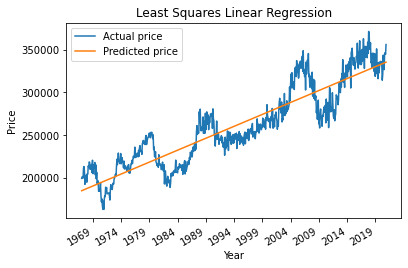

In [ ]:
%matplotlib inline
        
prices_dict = {}
prices_dict["Actual price"] = df["REAL"]
prices_dict["Predicted price"] = preds
fig, ax = plot_data(df["DATE"], prices_dict)

plt.title("Least Squares Linear Regression")
plt.ylabel("Price")
plt.xlabel("Year")
plt.legend()
# plt.savefig('lr.png', dpi=400, bbox_inches='tight')
plt.show()